# Aprendizaje Automático - Práctica 2 - Complejidad de H y Modelos Lineales

#### Valoración máxima: 12 puntos (+1.5 puntos de Bonus)

#### Fecha límite de entrega: 7 de Mayo de 2023 a las 23:59

#### Entrega a través de https://pradogrado2223.ugr.es/

### Nombre completo: <mark>POR FAVOR, ESCRIBA AQUÍ SU NOMBRE</mark>



---

Este trabajo, cuya puntuación máxima será de 12 puntos (+1.5 puntos de bonus), pretende servir como práctica y refuerzo de los conocimientos adquiridos en teoría, relativos a modelos lineales de clasificación.

Límite de entrega: **7 de Mayo de 2023 a las 23:59 (PRADO)**


**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero .ipynb). No es necesario entregar ninguna memoria externa, pero el código debe estar bien comentado, y todas las decisiones tomadas y el trabajo desarrollado deben documentarse suficientemente en celdas de texto. 

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final, dado que es altamente improbable que se extienda la fecha de entrega.  

- Reiterar que es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también una valoración razonada sobre la calidad de los
resultados obtenidos. Sin esta documentación, se considera que el trabajo NO ha sido presentado. 

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo. 

- El codigo NO puede escribir nada a disco.

- El path de lectura desde Google Drive debe ser siempre el mismo, que es el que se indica en este Notebook. 

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- El código debe estar obligatoriamente comentado explicando lo que realizan los distintos apartados y/o bloques.

- Se entrega solamente este Notebook, y no los datos empleados.


---

## <font color='blue'>Ejercicio 1: COMPLEJIDAD DE H Y EL RUIDO (4 puntos)</font>

<font color='blue'>En este ejercicio intentaremos profundizar un poco en la dificultad que introduce el ruido de las etiquetas en la elección de la clase de funciones más adecuada para resolver un determinado problema. 



In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Fijamos la semilla aleatoria
np.random.seed(1)

<font color='blue'>Haremos uso de tres funciones, que se incluyen a continuación: 

<font color='blue'>$simula\_unif(N, dim, rango)$, que calcula una lista de $N$ vectores de dimensión $dim$. Cada vector contiene $dim$ números aleatorios uniformes en el intervalo $rango$.

In [ ]:
def simula_unif(N, dim, rango):
	return np.random.uniform(rango[0],rango[1],(N,dim))

<font color='blue'>$simula\_gauss(N, dim, sigma)$, que calcula una lista de longitud $N$ de vectores de dimensión $dim$, donde cada posición del vector contiene un número aleatorio extraído de una distribucción Gaussiana de media 0 y varianza dada (para cada dimension, por la posición del vector $sigma$).

In [ ]:
def simula_gauss(N, dim, sigma):
    media = 0    
    out = np.zeros((N,dim),np.float64)        
    for i in range(N):
        # Para cada columna dim se emplea un sigma determinado. Es decir, para 
        # la primera columna (eje X) se usará una N(0,sqrt(sigma[0])) 
        # y para la segunda (eje Y) N(0,sqrt(sigma[1]))
        out[i,:] = np.random.normal(loc=media, scale=np.sqrt(sigma), size=dim)
    
    return out

<font color='blue'>$simula\_recta(intervalo)$, que simula de forma aleatoria los parámetros $v = (a, b)$ de una
recta, $y = ax + b$, dado un determinado intervalo (dentro del cual se generan dos puntos aleatorios, que se emplearán para calcular la pendiente y el término independiente de la recta).

In [ ]:
def simula_recta(intervalo):
    points = np.random.uniform(intervalo[0], intervalo[1], size=(2, 2))
    x1 = points[0,0]
    x2 = points[1,0]
    y1 = points[0,1]
    y2 = points[1,1]
    # y = a*x + b
    a = (y2-y1)/(x2-x1) # Cálculo de la pendiente.
    b = y1 - a*x1       # Cálculo del termino independiente.
    
    return a, b

#### <font color='blue'>a)  (1 punto) Visualización de puntos iniciales.

<font color='blue'>Vamos a valorar la influencia del ruido en la selección de la clase de funciones y su complejidad. Con ayuda de la función $simula\_unif()$ generamos una
muestra de 100 puntos 2D, en el intervalo $[-50, 50]$,  a los que vamos añadir una etiqueta usando el signo de la función $f(x, y) = y - ax - b$, es decir el signo de la distancia de cada punto a la recta simulada con
$simula\_recta()$.

Dibujar un gráfico 2D con los puntos etiquetados. Dibuje también la recta usada para etiquetar. Observe y verifique (por medio del error de clasificación) que todos los puntos están bien clasificados respecto de la recta.
</font>


In [ ]:
"""
np.sign(0) da 0 (véase https://numpy.org/doc/stable/reference/generated/numpy.sign.html), lo que, en ciertas ocasiones, puede ser problemático
Por ese motivo, proporcionamos esta sencilla función que devuelve el signo del valor que se le proporciona como entrada
Si esta función se emplea con un array, se obtendrá el error "ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()"
Si quiere poder emplearse con arrays, bastaría vectorizarla:
		numeros = np.random.randint(-10,10,10)
		sgn = np.vectorize(signo)
		print(numeros)
		print(sgn(numeros))
"""
def signo(x):
	if x >= 0:
		return 1
	return -1

def f(x, y, a, b):
	return signo(y - a*x - b)

Misclassification rate: 0.0%


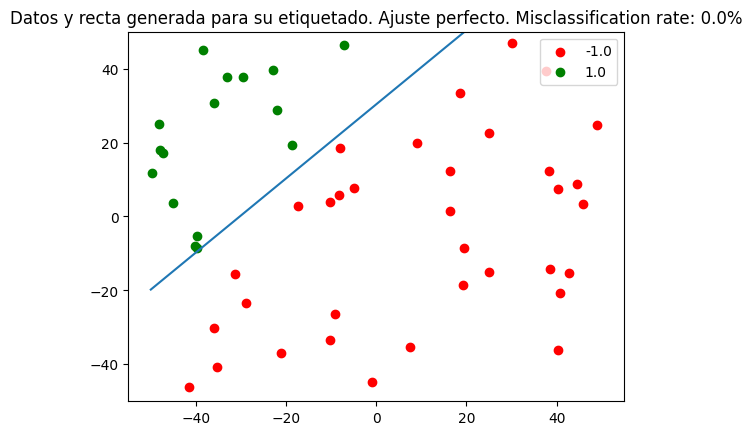

In [ ]:
intervalo = [-50,50]
... A CUBRIR POR LOS ESTUDIANTES...



#### <font color='blue'>b) (0.5 puntos)  Introducción de ruido. 
Modifique de forma aleatoria un 10\% de las etiquetas positivas y otro
10\% de las negativas y guarde los puntos con sus nuevas etiquetas. Dibuje de nuevo
la gráfica anterior. Ahora habrá puntos mal clasificados respecto de la recta.</font>


Misclassification rate: 10.0%


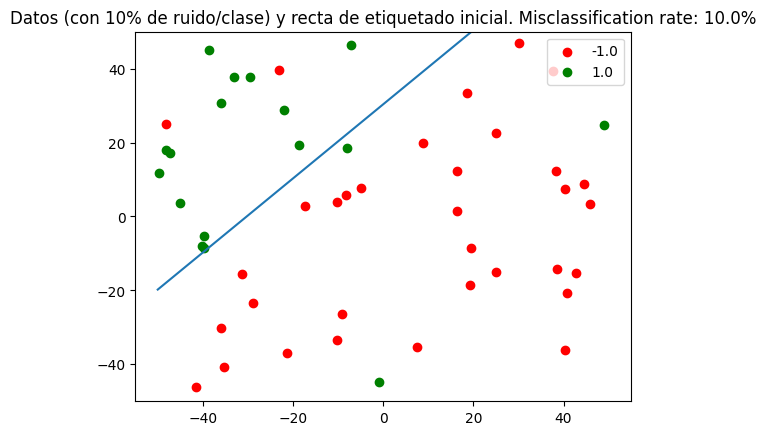

In [ ]:
... A CUBRIR POR LOS ESTUDIANTES...



#### <font color='blue'>c) (2.5 puntos)  Análisis y comparación de distintas fronteras de decisión. 
Supongamos ahora que las siguientes funciones definen la frontera de
clasificación de los puntos de la muestra en lugar de una recta.</font>

<font color='blue'>$f_1(x, y) = (x - 10)^2 + (y - 20)^2 - 400$</font>

<font color='blue'>$f_2(x, y) = 0.5(x + 10)^2 + (y - 20)^2 - 400$</font>

<font color='blue'>$f_3(x, y) = 0.5(x - 10)^2 - (y + 20)^2 - 400$</font>

<font color='blue'>$f_4(x, y) = y - 20x^2 - 5x + 3$</font>


<font color='blue'>

Visualizar el etiquetado generado en el Apartado (b) junto con la gráfica de cada
una de las funciones. Muéstrense los porcentajes de acierto en clasificación para las funciones (es decir, fronteras de decisión) evaluadas. Argumente si estas funciones más
complejas son mejores clasificadores que la función lineal. Observe las gráficas y diga
qué consecuencias extrae sobre la influencia de la modificación de etiquetas
en el proceso de aprendizaje. En concreto, razone sobre cuestiones como las siguientes: ¿Necesariamente funciones más complejas son mejores clasificadores (es decir, representan “mejores” bordes de decisión)? ¿Es posible superar/mejorar ese 10% de error de clasificación? ¿Qué pasa si repetimos el proceso con estas funciones más complejas (las empleamos para etiquetar los datos y luego metemos un 10% de ruido)? ¿Qué error de clasificación tenemos? ¿Es menor que ese 10%?
</font>



In [ ]:
"""
Esta función permite visualizar las fronteras de decisión.

Entradas: 
- X: datos de entrada con tantas filas como ejemplos, y tantas columnas como dimensiones/features
- y: etiquetas
- fz: función que define la frontera de decisión
- title: título que se le quiere poner a la figura
- xaxis: nombre que se le quiere poner al eje X
- yaxis: nombre que se le quiere poner al eje Y

Salida: visualización de los datos junto con la frontera de decisión proporcionada

Ejemplo de uso: 
def f_prueba(X):
	return X[:,0]**2 + X[:,1]**2 - 200
plot_datos_cuad(X, y, f_prueba, title=r'$f_{prueba}(x, y) = x^2 + y^2 - 200$')
"""
def plot_datos_cuad(X, y, fz, title='Point cloud plot', xaxis='x axis', yaxis='y axis'):
    #Preparar datos
    min_xy = X.min(axis=0)
    max_xy = X.max(axis=0)
    border_xy = (max_xy-min_xy)*0.01
    
    #Generar grid de predicciones
    # np.mgrid es una versión multidimensional de meshgrid (https://numpy.org/doc/stable/reference/generated/numpy.mgrid.html)
    xx, yy = np.mgrid[min_xy[0]-border_xy[0]:max_xy[0]+border_xy[0]+0.001:border_xy[0], 
                      min_xy[1]-border_xy[1]:max_xy[1]+border_xy[1]+0.001:border_xy[1]]
    # np.ravel "aplana" un array (https://numpy.org/doc/stable/reference/generated/numpy.ravel.html)
    # Diferencias entre ravel y flatten: https://stackoverflow.com/questions/28930465/what-is-the-difference-between-flatten-and-ravel-functions-in-numpy
    # np.c_ permite concatenar arrays a lo largo del segundo eje (https://numpy.org/doc/stable/reference/generated/numpy.c_.html)
    grid = np.c_[xx.ravel(), yy.ravel(), np.ones_like(xx).ravel()]
    pred_y = np.sign(fz(grid)).reshape(xx.shape)
    
    #Plot
    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, pred_y, 50, cmap='RdBu',vmin=-1, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label('$f(x, y)$')
    ax_c.set_ticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, linewidth=1, 
                cmap="RdYlBu", edgecolor='white')
    
    XX, YY = np.meshgrid(np.linspace(round(min(min_xy)), round(max(max_xy)),X.shape[0]),np.linspace(round(min(min_xy)), round(max(max_xy)),X.shape[0]))
    positions = np.vstack([XX.ravel(), YY.ravel()])
    # ax.contour(XX,YY,fz(positions.T).reshape(X.shape[0],X.shape[0]),[0], colors='white')
    
    ax.set(
       xlim=(min_xy[0]-border_xy[0], max_xy[0]+border_xy[0]), 
       ylim=(min_xy[1]-border_xy[1], max_xy[1]+border_xy[1]),
       xlabel=xaxis, ylabel=yaxis)
    plt.title(title)
    plt.show()

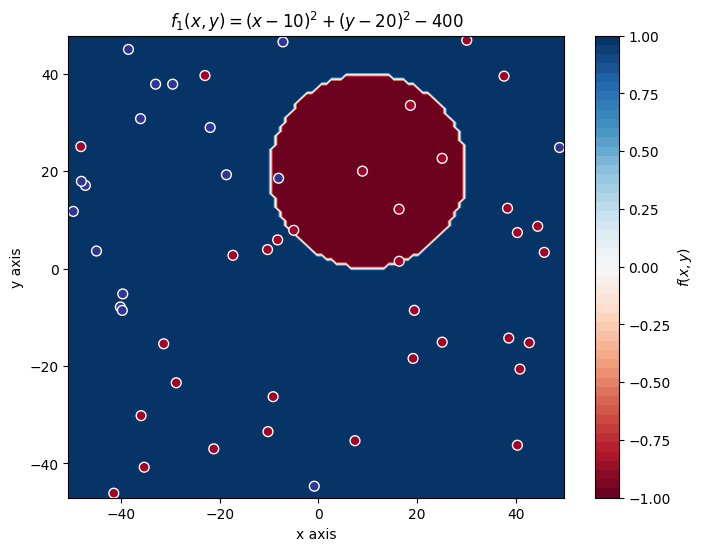

Misclassification rate: 56.0%


In [ ]:
... A CUBRIR POR LOS ESTUDIANTES...
print('Misclassification rate: {}%'.format(MC_rate))

## <font color='blue'>Ejercicio 2: MODELOS LINEALES (8 puntos) </font>

### <font color='blue'>Apartado 2.1 (3 puntos) Algoritmo Perceptrón (PLA). 

<font color='blue'>Implementar la función $ajusta\_PLA(datos, label, max\_iter, vini)$ que calcula el hiperplano solución a un problema de clasificación binaria usando el algoritmo PLA. La entrada $datos$ es una matriz donde cada ejemplo está representado por una fila de la matriz, $label$ el vector de etiquetas (cada etiqueta es
un valor +1 o -1), $max\_iter$ es el número máximo de iteraciones permitidas y $vini$
el valor inicial del vector. La función devuelve, como mínimo, los coeficientes del hiperplano y la iteración de convergencia.  </font>



In [ ]:
def ajusta_PLA(datos, label, max_iter, vini):
    ... A CUBRIR POR LOS ESTUDIANTES...

<font color='blue'>Ejecutar el algoritmo PLA con los datos empleados en el Apartado (a) del Ejercicio 1. Inicializar el algoritmo con: 

<font color='blue'>i) el vector cero y, 

<font color='blue'>ii) con vectores de
números aleatorios en [0, 1] (10 veces). 

<font color='blue'>Anotar el número medio de iteraciones
necesarias en ambos para converger. Se deben mostrar en una tabla cada uno de los pesos iniciales empleados, los finales (obtenidos tras el proceso de entrenamiento), y el porcentaje de error de clasificación. También se debe visualizar una nube de puntos etiquetada junto con la frontera resultante del ajuste. Valorar el resultado relacionando el punto
de inicio con el número de iteraciones. </font>

In [ ]:
... A CUBRIR POR LOS ESTUDIANTES...



<font color='blue'>Ahora, hay que hacer lo mismo usando  los datos del Apartado (b) del Ejercicio 1, y $150.000$ como número máximo de iteraciones. ¿Se observa algún comportamiento diferente? En caso afirmativo, diga cuál y las
razones para que ello ocurra. </font>

In [ ]:
... A CUBRIR POR LOS ESTUDIANTES...

### <font color='blue'>Apartado 2.2 (5 puntos) Regresión Logística (RL). 


<font color='blue'>En este ejercicio emplearemos nuestra propia función
objetivo $f$ y un conjunto de datos $\mathcal{D}$ para ver cómo
funciona regresión logística. Consideraremos $d = 2$ para que los datos sean fácilmente visualizables, y emplearemos $\mathcal{X} = [0, 2] \times [0, 2]$ con
probabilidad uniforme de elegir cada $x \in \mathcal{X}$. Elegir una línea en el plano que pase por
$\mathcal{X}$ como la frontera que separa la región en donde $y$ toma valores +1 y -1. Para ello, seleccionar dos puntos aleatorios de $\mathcal{X}$ y calcular la línea
que pasa por ambos. 

<font color='blue'>Impleméntese RL con Gradiente Descendente Estocástico (SGD) del siguiente modo:

> <font color='blue'>1) Inicializar el vector de pesos con valores 0.

> <font color='blue'>2) Parar el algoritmo cuando $\|w^{(t+1)} - w^{(t)}\| < 0.01$, donde $w(t)$ denota el vector
de pesos al final de la época $t$. Recuérdese que una época es un pase completo a través de los $N$
ejemplos de nuestro conjunto de datos.

> <font color='blue'>3) Aplicar una permutación aleatoria de $\{1, 2,..., N\}$ a los índices de los datos, antes
de usarlos en cada época del algoritmo.

</font>


In [ ]:
def sgdRL(x, y, lr, tam_minibatch, max_epocas):
    ... A CUBRIR POR LOS ESTUDIANTES...

<font color='blue'>A continuación, empleando la implementación anterior, realícese el siguiente experimento:
 
> <font color='blue'>1) Seleccione $N = 100$ puntos aleatorios $\{{\bf x}_n \}$ de $\mathcal{X}$ y evalúe las
respuestas $\{y_n\}$ de todos ellos respecto de la frontera elegida. 

> <font color='blue'>2) Ejecute RL para encontrar la función solución $g$. Visualice la frontera de decisión encontrada, y muestre el $E_{in}$ y el porcentaje de acierto en clasificación correspondientes. Se debe escoger experimentalmente tanto el $\textit{learning rate}$ (tasa de aprendizaje $\eta$) como el tamaño de batch. 

> <font color='blue'>3) Evalúe el error $E_{out}$ usando para ello una nueva muestra de datos ($>999$).  Muéstrense, de nuevo, tanto el ajuste visual, como el $E_{out}$ y el porcentaje de acierto en test. 

> <font color='blue'>4) Repita el experimento anterior (pasos 1-3) $50$ veces, y calcule los valores promedio de $E_{in}$ y $E_{out}$, de porcentaje de error de clasificación (en entrenamiento y test), y de épocas necesarias para converger (en entrenamiento).   

<font color='blue'>Junto con la realización del experimento anteriormente descrito, discuta qué ocurriría si, como criterio de parada, se emplease la diferencia entre pesos obtenidos en sucesivas iteraciones (en lugar de en sucesivas épocas). Del mismo modo, explique cómo ha escogido el $\textit{learning rate}$ y el $\textit{batch size}$, y las conclusiones que extrae al respecto (por ejemplo, ¿valores de $\textit{learning rate}$ como 0.001, cuando se emplea la diferencia de pesos entre épocas como criterio de terminación, funcionan adecuadamente y permiten resolver el problema?). 




In [ ]:
np.random.seed(0)

intervalo=[0,2]
... A CUBRIR POR LOS ESTUDIANTES...

<font color='blue'>Ahora repita el mismo experimento, pero empleando datos no linealmente separables. Para ello, debe introducirse un 10% de ruido por clase. 

In [ ]:
np.random.seed(0)

intervalo=[0,2]
... A CUBRIR POR LOS ESTUDIANTES...



---

## <font color='blue'> Bonus (1.5 puntos). Clasificación de dígitos.

El BONUS solo se tendrá en cuenta si se ha obtenido al menos el 75\% de los puntos de la
parte obligatoria.</font>

<font color='blue'>Considerar el conjunto de datos de dígitos manuscritos, y seleccionar las muestras de los dígitos 4 y 8. Extraer las características de intensidad promedio y simetría en la manera que se indicó en la práctica anterior.
</font>

<font color='blue'> 1) Plantear un problema de clasificación binaria que considere el conjunto de entrenamiento
como datos de entrada para aprender la función $g$.

<font color='blue'> 2) Compárense los modelos de regresión lineal, PLA, RL y PLA-Pocket. 

> <font color='blue'> a) Generar gráficos separados de los datos de entrenamiento y test junto con
la función estimada.

> <font color='blue'> b) Calcular $E_{in}$ y $E_{test}$ (error sobre los datos de test).

> <font color='blue'> c) Si se emplean los pesos obtenidos con regresión lineal para inicializar los otros tres métodos (RL, PLA, PLA-pocket), ¿se observa alguna mejora en los resultados a algún nivel? Justifique su respuesta.

> <font color='blue'> d) Obtener cotas sobre el verdadero valor de $E_{out}$ para los cuatro métodos empleados. Calcúlense dos cotas: una
basada en $E_{in}$ y otra basada en $E_{test}$. Usar una tolerancia $\delta = 0.05$. ¿Qué cota es
mejor? Justifique la respuesta.  


In [ ]:
#Para acceder a nuestros ficheros de Google Drive
from google.colab import drive
drive.mount('/content/drive')
# La carpeta datos (que contiene X_train.npy, y_train.npy, X_test.npy y y_test.npy) 
# debe estar en vuestro Drive, dentro de la carpeta 'Colab Notebooks'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Funcion para leer los datos
def readData(file_x, file_y, class1, class2, label_class1, label_class2):
    # Leemos los ficheros    
    datax = np.load(file_x)
    datay = np.load(file_y)
    y = []
    x = []    
    # Solo guardamos los datos de las dos clases que nos interesan
    for i in range(0,datay.size):
        if datay[i] == class1 or datay[i] == class2:
            if datay[i] == class1:
                y.append(label_class1)
            else:
                y.append(label_class2)
            x.append(np.array([1, datax[i][0], datax[i][1]]))
            
    x = np.array(x, np.float64)
    y = np.array(y, np.float64)
    
    return x, y

In [ ]:
class1 = 8 #dígito 8
class2 = 4 #dígito 4
label1 = 1 #etiqueta empleada para representar class1
label2 = -1 #etiqueta empleada para representar class2
# Lectura de los datos de entrenamiento 
x, y = readData('drive/MyDrive/Colab Notebooks/datos/X_train.npy', 
                'drive/MyDrive/Colab Notebooks/datos/y_train.npy', class1, class2, label1, label2)
# Lectura de los datos para el test
x_test, y_test = readData('drive/MyDrive/Colab Notebooks/datos/X_test.npy', 
                          'drive/MyDrive/Colab Notebooks/datos/y_test.npy', class1, class2, label1, label2)